In [1]:
import datacube
#dc = datacube.Datacube(env='sentinel2betatmp', config='/home/547/aw3463/.sent2.conf')
dc = datacube.Datacube()
query={'time': ('2018-01-01', '2018-12-31'),
 'lat': (-30.595141582265763, -30.573900084400902),
 'lon': (115.14502132590322, 115.16618234076345),
 'output_crs': 'EPSG:3577',
 'resampling': 'bilinear',
 'resolution': (-25.0, 25.0)}
b_names = ['nbar_coastal_aerosol', 'nbar_blue', 'nbar_green', 'nbar_red', 'nbar_red_edge_1', 'nbar_red_edge_2', 'nbar_red_edge_3', 'nbar_nir_1', 'nbar_nir_2', 'nbar_swir_2', 'nbar_swir_3']
#sat_array = dc.load(product='s2b_ard_granule', measurements=b_names, **query)
sat_array = dc.load(product='ls8_nbar_scene', **query)
sat_array.rename({'1': 'coastal_aerosol', '2': 'blue', '3': 'green', '4': 'red', '5': 'nir', '6': 'swir1', '7': 'swir2'}, inplace=True)


<xarray.Dataset>
Dimensions:          (time: 13, x: 93, y: 106)
Coordinates:
  * time             (time) datetime64[ns] 2018-01-12T02:11:19 ...
  * y                (y) float64 -3.433e+06 -3.433e+06 -3.433e+06 -3.433e+06 ...
  * x                (x) float64 -1.595e+06 -1.595e+06 -1.595e+06 -1.595e+06 ...
Data variables:
    coastal_aerosol  (time, y, x) int16 813 666 456 512 569 544 505 505 555 ...
    blue             (time, y, x) int16 818 650 421 485 552 517 472 479 541 ...
    green            (time, y, x) int16 1086 901 608 673 746 729 679 690 780 ...
    red              (time, y, x) int16 1262 1014 628 726 826 793 731 739 ...
    nir              (time, y, x) int16 2898 2523 2223 2294 2263 2198 2195 ...
    swir1            (time, y, x) int16 2627 2199 1702 1887 2118 2162 2086 ...
    swir2            (time, y, x) int16 1645 1370 998 1119 1278 1289 1218 ...
Attributes:
    crs:      EPSG:3577

In [2]:
durf = 100*sat_array.groupby('time').std()/sat_array.groupby('time').mean()

In [3]:
spee = durf.to_dataframe()


In [4]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9.5, 9.5))
spee.hist(ax=axes)

/g/data/v10/public/modules/dea-env/20180629/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b7cdc6cf8>,
      dtype=object)

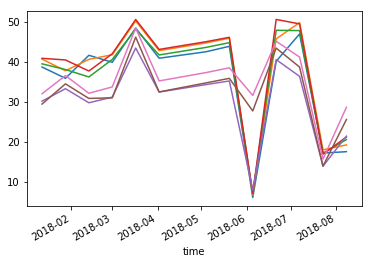

In [5]:
spee.plot(legend=False)


In [6]:
query={'time': ('2018-02-05', '2018-02-15'),
 'lat': (-30.595141582265763, -30.573900084400902),
 'lon': (115.14502132590322, 115.16618234076345),
 'output_crs': 'EPSG:3577',
 'resampling': 'bilinear',
 'resolution': (-25.0, 25.0)}
sat_array2 = dc.load(product='ls8_nbar_scene', **query)
sat_array2.rename({'1': 'coastal_aerosol', '2': 'blue', '3': 'green', '4': 'red', '5': 'nir', '6': 'swir1', '7': 'swir2'}, inplace=True)
sat_array2

<xarray.Dataset>
Dimensions:          (time: 1, x: 93, y: 106)
Coordinates:
  * time             (time) datetime64[ns] 2018-02-13T02:11:03.500000
  * y                (y) float64 -3.433e+06 -3.433e+06 -3.433e+06 -3.433e+06 ...
  * x                (x) float64 -1.595e+06 -1.595e+06 -1.595e+06 -1.595e+06 ...
Data variables:
    coastal_aerosol  (time, y, x) int16 968 831 520 506 547 534 512 539 600 ...
    blue             (time, y, x) int16 974 810 474 449 492 469 450 489 566 ...
    green            (time, y, x) int16 1241 1061 640 559 601 594 608 679 ...
    red              (time, y, x) int16 1377 1142 611 559 622 611 615 689 ...
    nir              (time, y, x) int16 3530 2930 2105 1838 1767 1701 1872 ...
    swir1            (time, y, x) int16 2971 2386 1505 1340 1511 1511 1611 ...
    swir2            (time, y, x) int16 1792 1443 881 771 863 851 898 1003 ...
Attributes:
    crs:      EPSG:3577

In [7]:
import DEAPlotting
#DEAPlotting.three_band_image(sat_array2, bands = ['red', 'green', 'blue'], time = 0, contrast_enhance=False)

In [8]:
dc2 = datacube.Datacube()
query={'time': ('2014-01-01', '2014-12-31'),
 'lat': (-30.595141582265763, -30.573900084400902),
 'lon': (115.14502132590322, 115.16618234076345),
 'output_crs': 'EPSG:3577',
 'resampling': 'bilinear',
 'resolution': (-25.0, 25.0)}
data = dc2.load(product='ls8_nbart_geomedian_annual', **query)
data

<xarray.Dataset>
Dimensions:  (time: 1, x: 93, y: 106)
Coordinates:
  * time     (time) datetime64[ns] 2014-01-01
  * y        (y) float64 -3.433e+06 -3.433e+06 -3.433e+06 -3.433e+06 ...
  * x        (x) float64 -1.595e+06 -1.595e+06 -1.595e+06 -1.595e+06 ...
Data variables:
    blue     (time, y, x) int16 714 459 387 466 475 468 445 467 505 517 525 ...
    green    (time, y, x) int16 943 667 559 671 671 663 653 697 764 764 754 ...
    red      (time, y, x) int16 1078 700 557 715 724 699 675 726 795 818 811 ...
    nir      (time, y, x) int16 2720 2384 2307 2383 2260 2248 2385 2497 2517 ...
    swir1    (time, y, x) int16 2535 1616 1479 1956 2009 2002 1902 1935 2106 ...
    swir2    (time, y, x) int16 1507 899 803 1113 1161 1147 1082 1088 1203 ...
Attributes:
    crs:      EPSG:3577

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3b7c4fb0b8>)

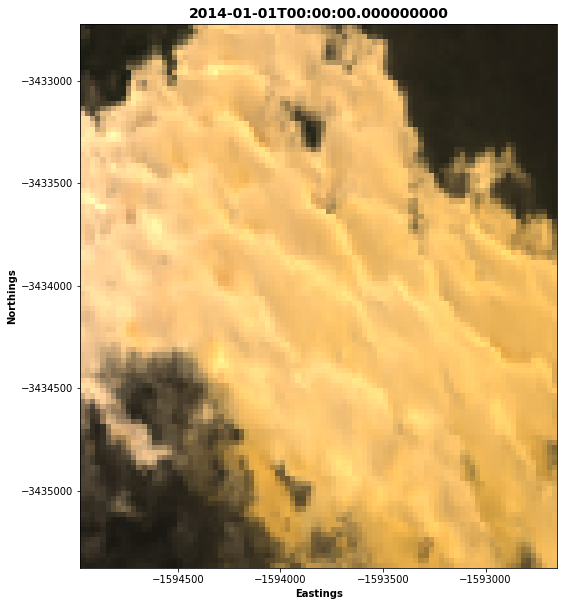

In [9]:
DEAPlotting.three_band_image(data, bands = ['red', 'green', 'blue'], time = 0, contrast_enhance=False)

In [10]:
del sat_array['coastal_aerosol']

In [11]:
diffo = abs(sat_array - data.squeeze(dim='time'))

xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset h

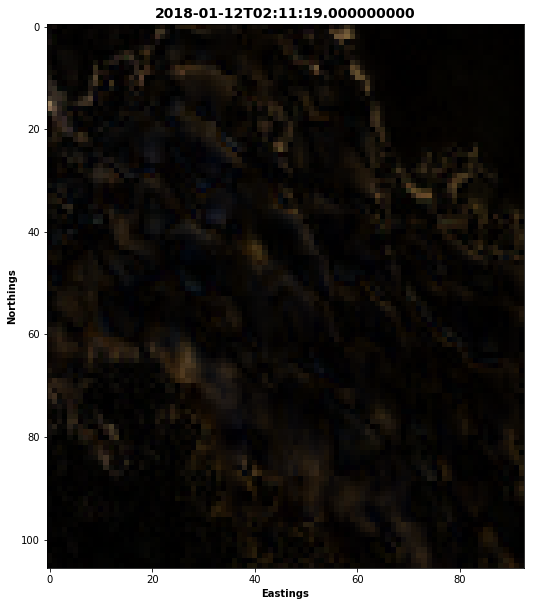

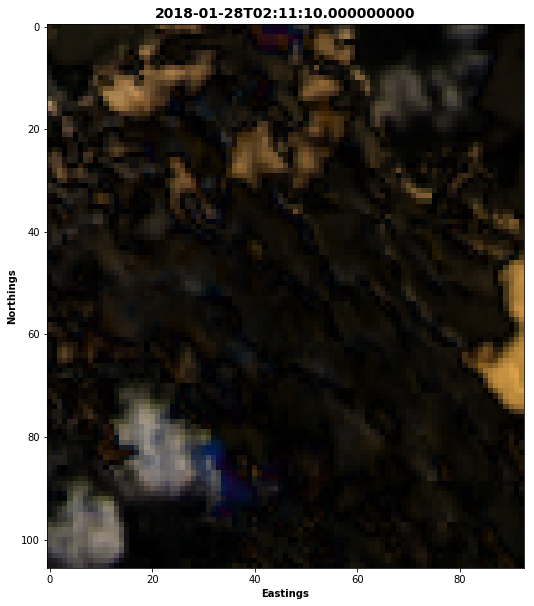

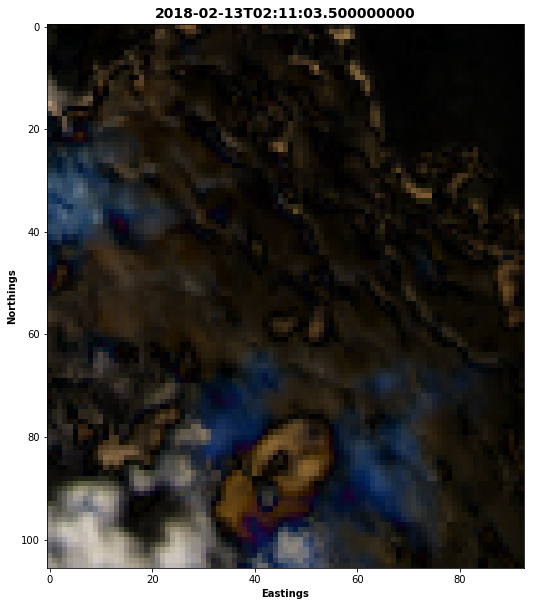

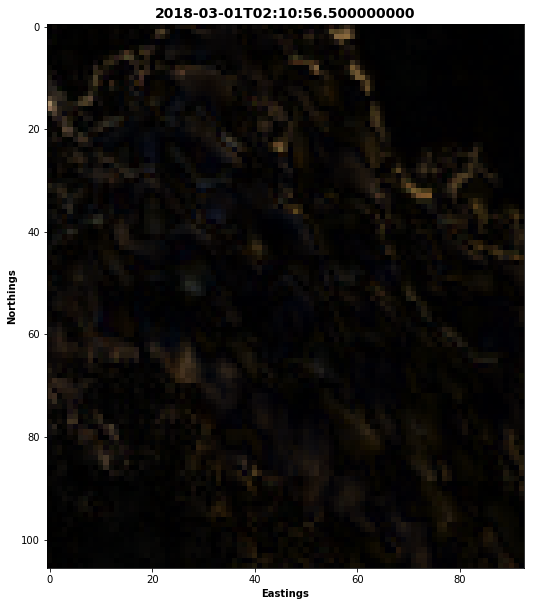

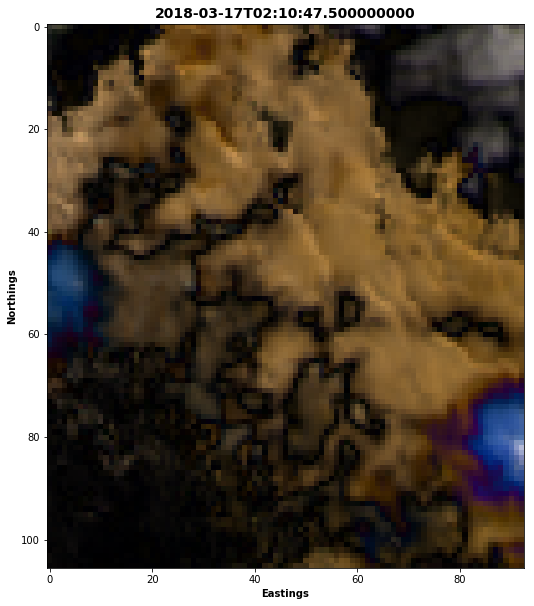

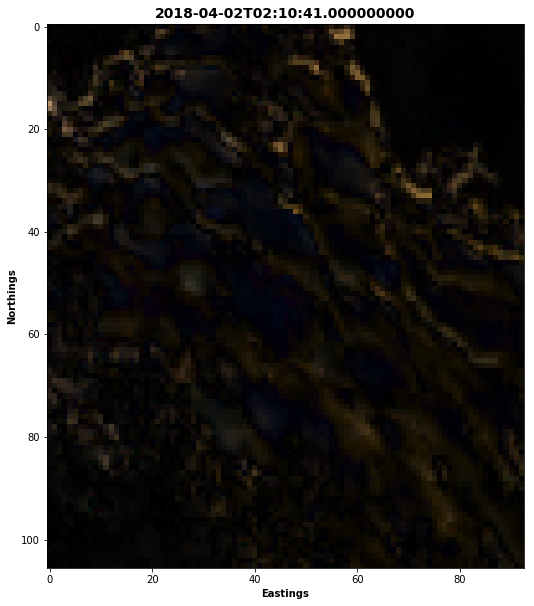

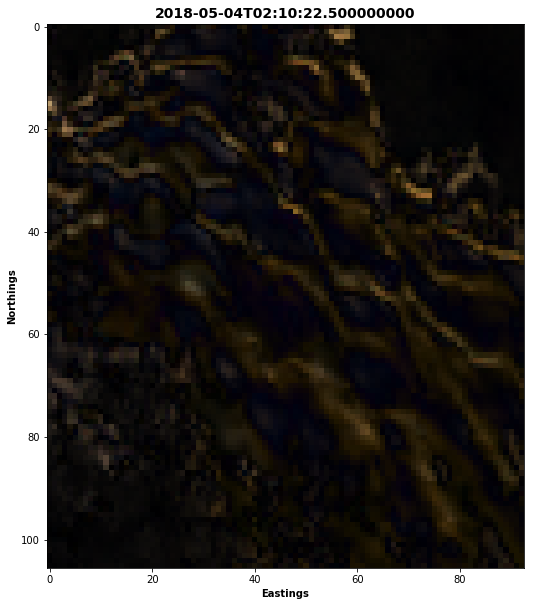

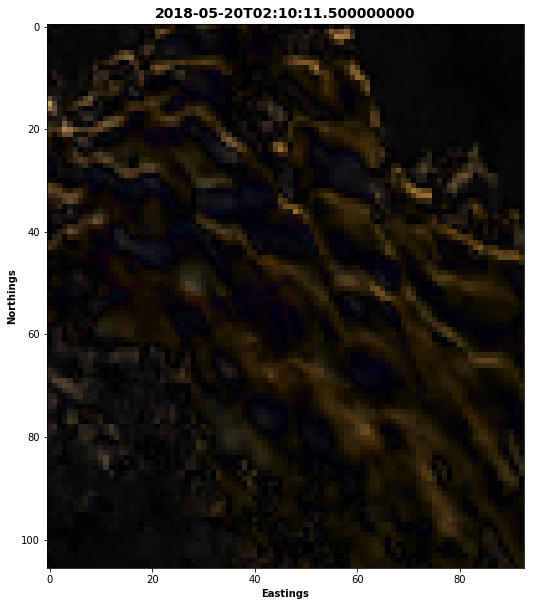

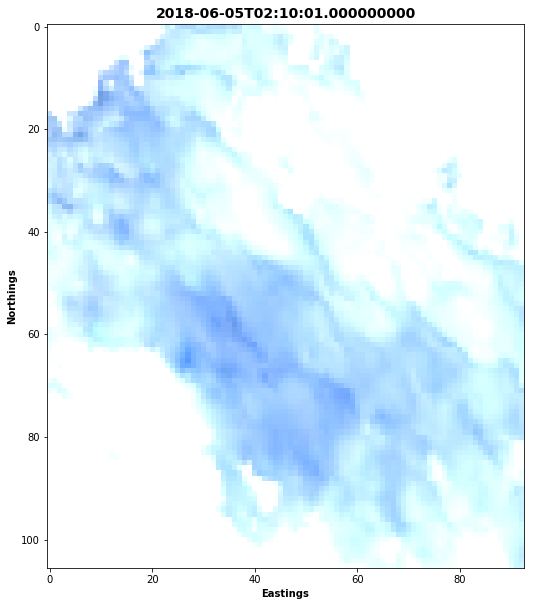

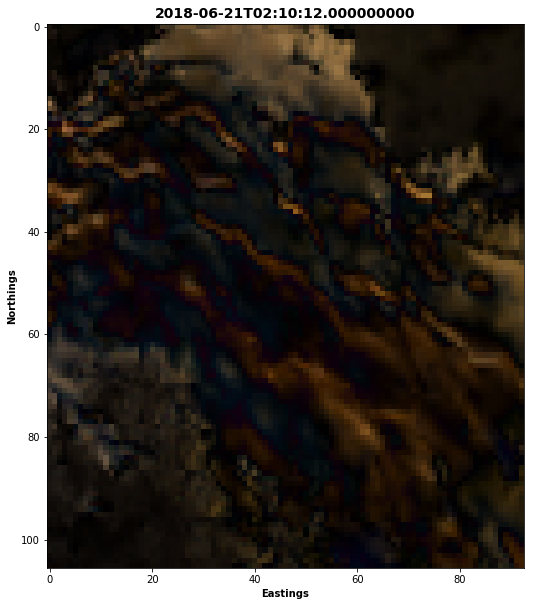

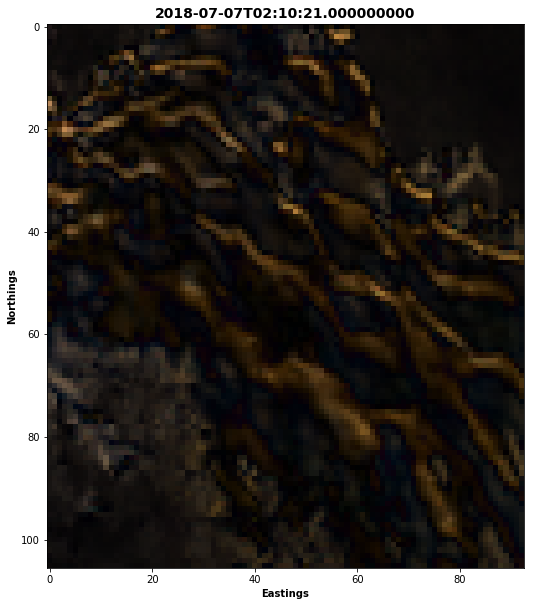

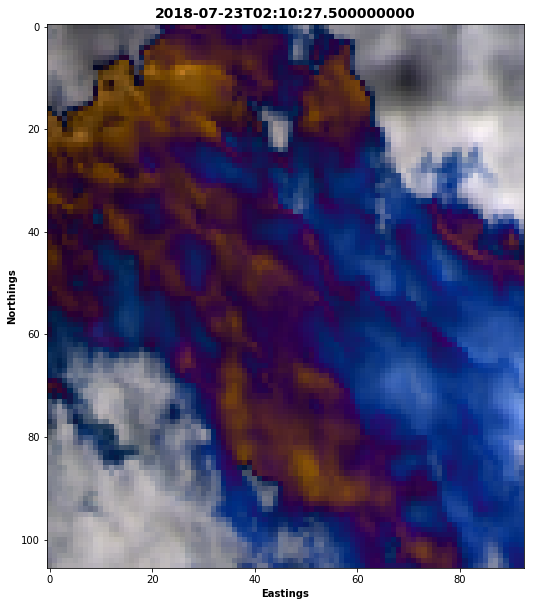

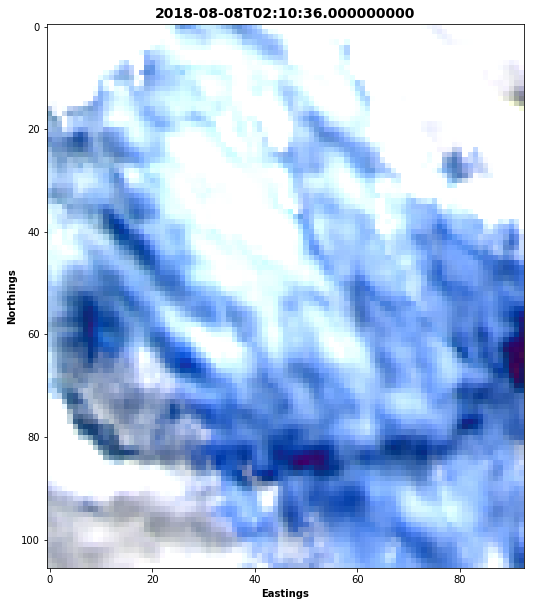

In [12]:
#fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(11.5, 9.5))
#plt.tight_layout(pad=5.5, w_pad=4.5, h_pad=2.5)

for i in range(len(sat_array['time'])):
    DEAPlotting.three_band_image(diffo, bands = ['red', 'green', 'blue'], time = i, contrast_enhance=False)
